In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

import os
import numpy as np
import matplotlib.pyplot as plt

# rewrite interpolator code
The `map` in the interpolator code is really weird, I don't like it. I want to rewrite it in a way I understand. First, I generate some test code. The model is a quadratic, for $-10 < x < 10$. I generate some $a,b,c$ through a multivariate Gaussian.

$$ f_{abc}(x) = a x^2 + bx + c $$

In [26]:
import numpy as np
xg = np.linspace(-10,10,100) # x grid
num_params = 3
draws, mean, sigma = 1000, 0.0, 2.0 # draws of a, b, c
params = np.random.multivariate_normal(mean=[0.0]*num_params, cov=np.diag([sigma]*num_params), size=draws)
obsarr = np.array( [ a * xg**2 + b*xg + c for a,b,c in params ] )

Let's plot a few of these.

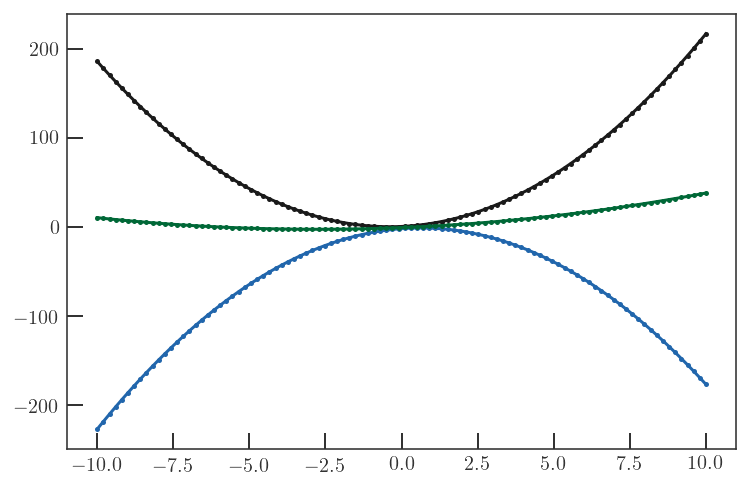

In [27]:
plt.plot( xg, obsarr[0], xg, obsarr[1], xg, obsarr[2]);

Here, we see Jia's interpolator. It has this annoying map function.

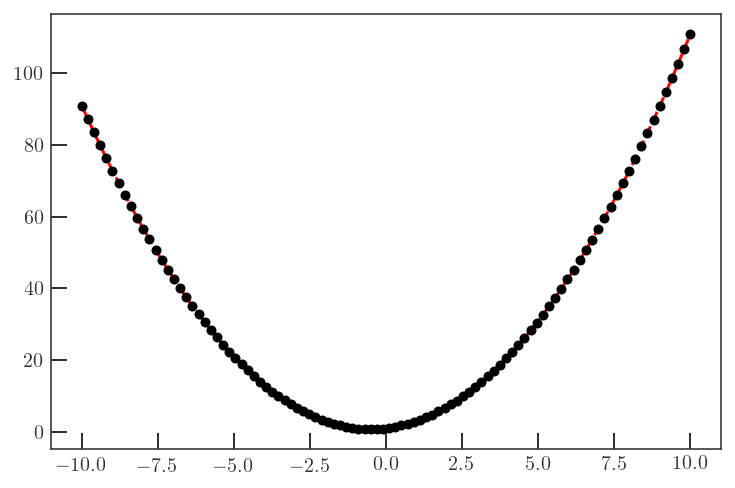

In [175]:
from forecast import buildInterpolator
interp = buildInterpolator(obsarr, params)
mu = interp( [1., 1., 1.] )
mu = np.array(list(mu.tolist())).reshape(100,) 
plt.plot( xg, xg*xg + xg + 1, 'r--' )
plt.plot( xg, mu, 'ko' )

In [173]:
from scipy.interpolate import Rbf

def buildInterpolatorPython(obs_arr, cosmo_params):
    '''Build an interpolator:
    Input:
    (1) obs_arr has dimension (Npoints, Nbin), where Npoints = # of cosmological models (=100 here), 
        and Nbins is the number of bins
    (2) cosmo_params has dimension (Npoints, Nparams)
    
    Output:
    spline_interps
    
    Usage:
    spline_interps = buildInterpolator(obs_arr, cosmo_params)
    spline_interps(_nu, Omega_m, A_s)
    '''
    
    # create a list of Rbf for each independent mode
    spline_interps = [ Rbf(*cosmo_params.T, model) for model in obs_arr.T ]
    
    # return a function that applies Rbf to the parameters given, for each mode
    return lambda *params: np.array([ii(*params) for ii in spline_interps])



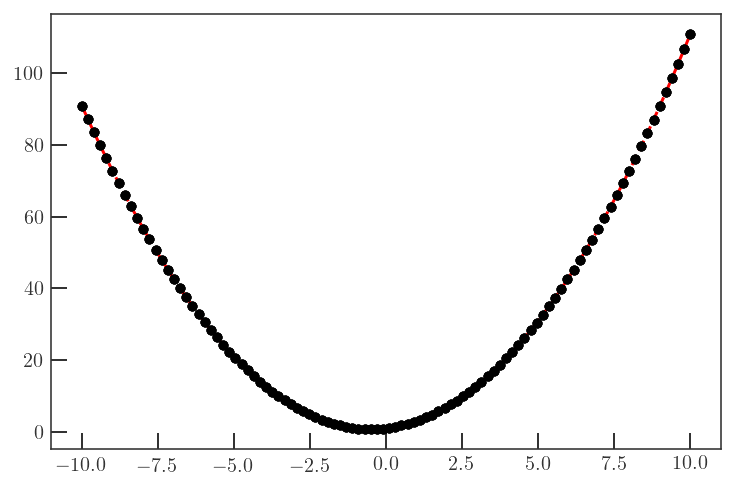

In [171]:
interp = buildInterpolatorPython(obsarr, params)
mu = interp( [1.,1.,1.] )
plt.plot( xg, xg*xg + xg + 1, 'r--' );
plt.plot( xg, mu, 'ko' );